In [1]:
import pandas as pd

import numpy as np


In [2]:
main_df = pd.read_csv('merged_data.csv')

## Adding in new features and 2017 and 2018 incidence rates

In [3]:
main_df = main_df.drop('Unnamed: 0', axis=1)
hiv_add = pd.read_csv('hiv_incidence_2017_2018.csv')
hiv_add['Geography']

0       Abbeville County, SC
1          Acadia Parish, LA
2        Accomack County, VA
3             Ada County, ID
4           Adair County, IA
                ...         
3219         Yuma County, AZ
3220         Yuma County, CO
3221       Zapata County, TX
3222       Zavala County, TX
3223      Ziebach County, SD
Name: Geography, Length: 3224, dtype: object

In [4]:
hiv_add['Geography'] = hiv_add['Geography'].astype(str).str
hiv_add['STATEABBREVIATION'] = hiv_add['Geography'][0][-2:]
hiv_add['COUNTY'] = hiv_add['Geography'][0][:-4]
hiv_add = hiv_add.drop('Geography', axis=1)


In [5]:
hiv_add['Rate per 100000 / 2017'].replace(to_replace=['Data suppressed'], value = None, inplace =True) 
hiv_add['Rate per 100000 / 2018'].replace(to_replace=['Data suppressed'], value = None, inplace =True) 

In [6]:
hiv_add.head()

,Rate per 100000 / 2018,Rate per 100000 / 2017,STATEABBREVIATION,COUNTY
0,Data suppressed,0,SC,Abbeville County
1,19.8,11.8,LA,Acadia Parish
2,19.8,11.8,VA,Accomack County
3,3.3,4.5,ID,Ada County
4,0,0,IA,Adair County


In [7]:
main_df= main_df.merge(hiv_add, how='left', on=['COUNTY', 'STATEABBREVIATION'])
main_df

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income,Rate per 100000 / 2018,Rate per 100000 / 2017
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,19410,333,514,1.715611,2.648120,8.5,12.8,20304,0,21.6
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,69724,925,1429,1.326659,2.049509,8.6,13.8,73058,7.6,6.1
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,11567,82,127,0.708913,1.097951,14.2,24.1,9145,28.3,0
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,9508,119,184,1.251578,1.935212,10.9,17.0,7078,20.1,25.9
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,21368,601,928,2.812617,4.342943,9.3,17.3,20934,10.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,Sweetwater County,WY,2015,0.0,0.0,0.0,86.5,3.0,0.0,...,16941,177,274,1.044803,1.617378,5.6,12.2,16687,0,0
3136,56039,Teton County,WY,2015,0.0,0.0,0.0,50.5,2.0,0.0,...,9172,50,78,0.545137,0.850414,3.6,8.5,7873,0,0
3137,56041,Uinta County,WY,2015,0.0,0.0,0.0,0.0,4.0,0.0,...,7401,75,116,1.013377,1.567356,5.8,14.2,7557,0,0
3138,56043,Washakie County,WY,2015,0.0,0.0,0.0,0.0,1.0,0.0,...,3141,17,27,0.541229,0.859599,7.9,14.2,3461,0,0


In [10]:
public_health_expenditure = pd.read_csv("public_health_response_data.csv")

In [11]:
public_health_expenditure.head()

,Location,per_cap_phe_2018,SSP_ban
0,AL,57.23,1
1,AK,96.52,1
2,AZ,9.66,1
3,AR,50.57,0
4,CA,65.71,0


In [12]:
main_df = main_df.merge(public_health_expenditure, how='left', left_on='STATEABBREVIATION', right_on="Location")

In [13]:
main_df

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income,Rate per 100000 / 2018,Rate per 100000 / 2017,Location,per_cap_phe_2018,SSP_ban
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,1.715611,2.648120,8.5,12.8,20304,0,21.6,AL,57.23,1
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,1.326659,2.049509,8.6,13.8,73058,7.6,6.1,AL,57.23,1
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,0.708913,1.097951,14.2,24.1,9145,28.3,0,AL,57.23,1
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,1.251578,1.935212,10.9,17.0,7078,20.1,25.9,AL,57.23,1
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,2.812617,4.342943,9.3,17.3,20934,10.3,0,AL,57.23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,Sweetwater County,WY,2015,0.0,0.0,0.0,86.5,3.0,0.0,...,1.044803,1.617378,5.6,12.2,16687,0,0,WY,53.37,0
3136,56039,Teton County,WY,2015,0.0,0.0,0.0,50.5,2.0,0.0,...,0.545137,0.850414,3.6,8.5,7873,0,0,WY,53.37,0
3137,56041,Uinta County,WY,2015,0.0,0.0,0.0,0.0,4.0,0.0,...,1.013377,1.567356,5.8,14.2,7557,0,0,WY,53.37,0
3138,56043,Washakie County,WY,2015,0.0,0.0,0.0,0.0,1.0,0.0,...,0.541229,0.859599,7.9,14.2,3461,0,0,WY,53.37,0


In [14]:
main_df['mme_percap']

0       1084.0
1       1148.5
2        577.6
3        563.0
4        459.0
         ...  
3135    1044.8
3136     387.8
3137    1067.8
3138    1444.0
3139     566.9
Name: mme_percap, Length: 3140, dtype: float64

In [15]:
main_df.columns

Index(['county_code', 'COUNTY', 'STATEABBREVIATION', 'YEAR', 'AMAT_fac',
       'HIVdiagnoses', 'HIVincidence', 'HIVprevalence', 'MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'ADULTMEN', 'MSM12MTH', 'MSM5YEAR',
       '%msm12month', '%msm5yr', 'unemployment_rate', 'poverty_rate',
       'household_income', 'Rate per 100000 / 2018', 'Rate per 100000 / 2017',
       'Location', 'per_cap_phe_2018', 'SSP_ban'],
      dtype='object')

In [17]:
state_df = main_df[['STATEABBREVIATION', 'YEAR', 'MSM12MTH', 'MSM5YEAR', 'HIVdiagnoses', 'HIVprevalence', 'HIVincidence']]

/home/salvir1/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 2015.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/home/salvir1/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 2015.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/salvir1/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 2015.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


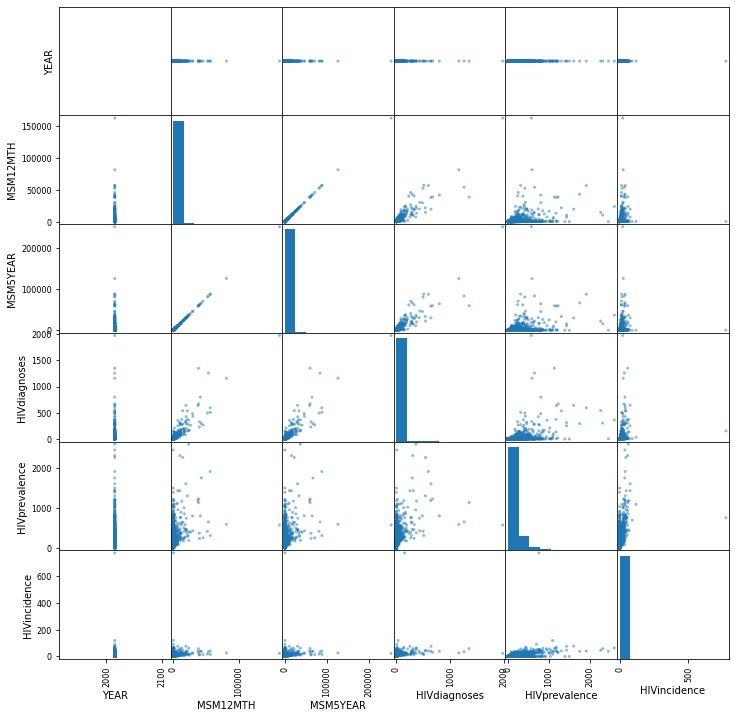

In [18]:
pd.plotting.scatter_matrix(state_df, figsize=(12, 12));

In [19]:
drug_df1 = main_df[['STATEABBREVIATION',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'HIVprevalence', 'HIVincidence']]

drug_df2 = main_df[['STATEABBREVIATION','PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
                   'HIVprevalence', 'HIVincidence']]


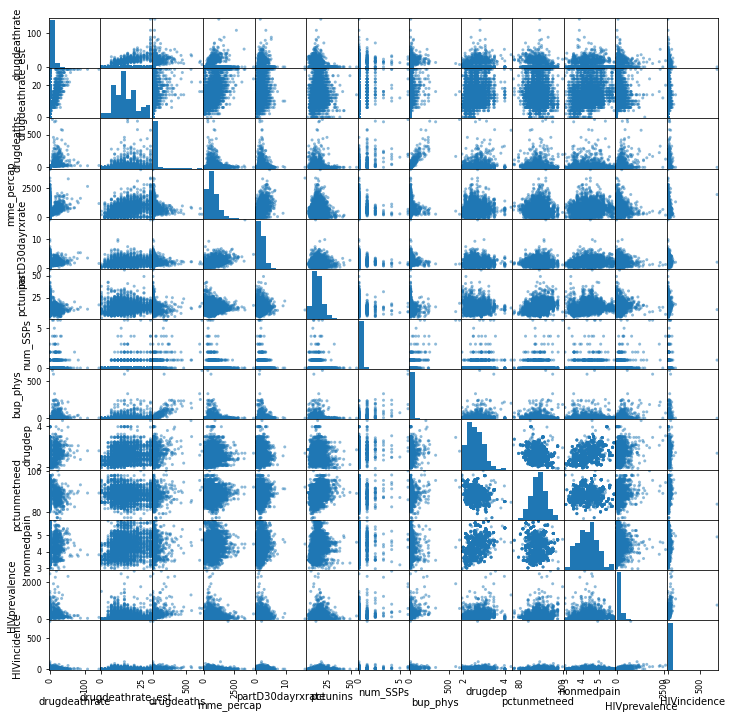

In [20]:
pd.plotting.scatter_matrix(drug_df1, figsize=(12,12));

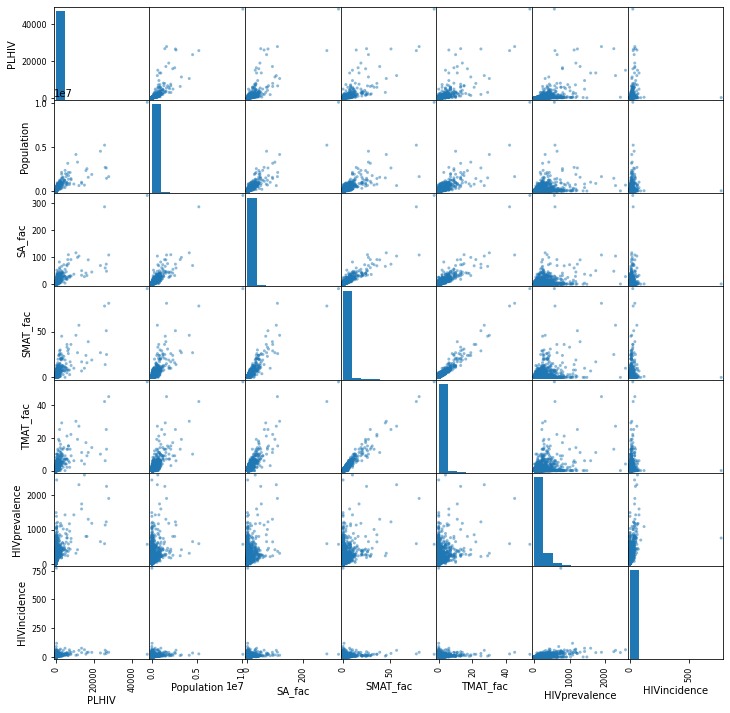

In [21]:
pd.plotting.scatter_matrix(drug_df2, figsize=(12,12));

In [22]:
men_df = main_df[['ADULTMEN', 'MSM12MTH', 'MSM5YEAR',
       '%msm12month', '%msm5yr', 'HIVprevalence', 'HIVincidence']]

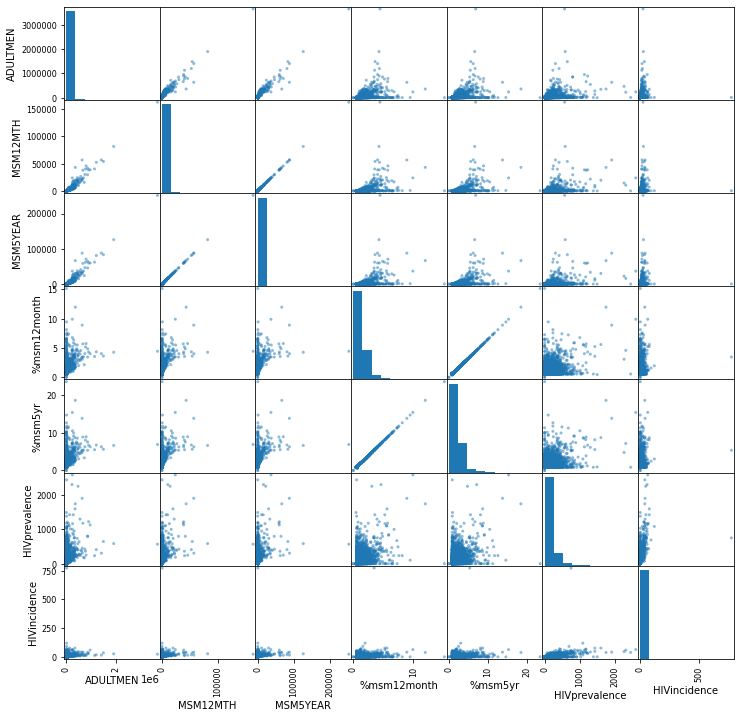

In [23]:
pd.plotting.scatter_matrix(men_df, figsize=(12,12));

In [25]:
income_df = main_df[['unemployment_rate', 'poverty_rate',
       'household_income', 'HIVprevalence', 'HIVincidence']]

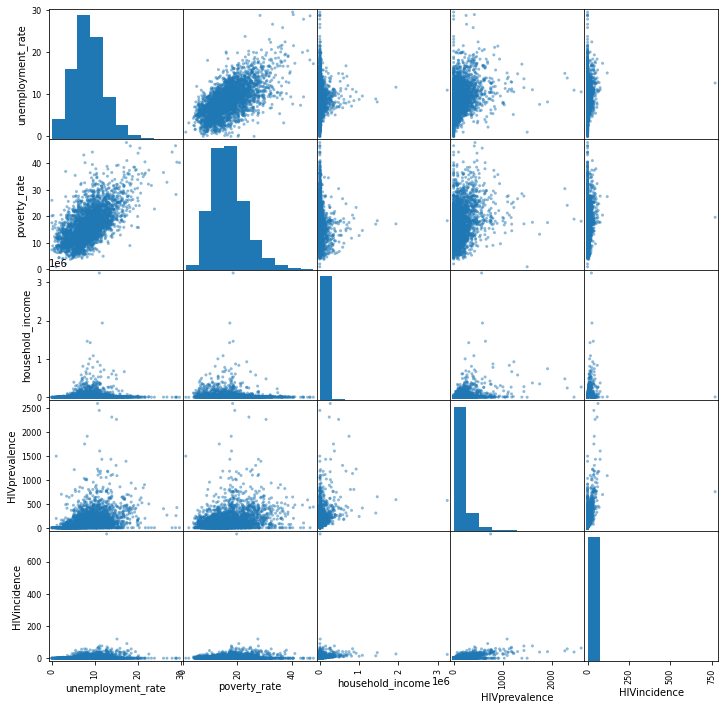

In [26]:
pd.plotting.scatter_matrix(income_df, figsize=(12,12));


In [27]:
state_groups = main_df.groupby('STATEABBREVIATION')[['county_code', 'COUNTY', 'YEAR',
       'AMAT_fac', 'HIVdiagnoses', 'HIVincidence', 'HIVprevalence', 'MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'ADULTMEN', 'MSM12MTH', 'MSM5YEAR',
       '%msm12month', '%msm5yr', 'unemployment_rate', 'poverty_rate',
       'household_income']].mean()

In [28]:
state_groups

,county_code,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
STATEABBREVIATION,,,,,,,,,,,,,,,,,,,,,
AK,2149.357143,2015.0,0.000000,0.464286,0.189286,33.614286,2.857143,0.000000,2.535714,1.714286,...,90.630357,4.450714,9860.928571,116.892857,180.607143,1.014812,1.549606,9.510714,12.610714,8928.142857
AL,1067.000000,2015.0,0.029851,8.820896,8.185075,228.462687,2.014925,0.029851,1.805970,1.044776,...,92.247164,5.195821,26187.805970,392.000000,606.029851,1.203133,1.861606,12.370149,21.826866,27495.134328
AR,5075.000000,2015.0,0.026667,2.626667,2.352000,161.080000,2.786667,0.000000,2.680000,0.253333,...,88.115333,5.218533,14356.480000,166.120000,256.853333,1.002534,1.551366,9.564000,21.516000,15099.840000
AZ,4013.866667,2015.0,0.400000,45.933333,5.633333,160.266667,21.800000,0.333333,17.933333,9.666667,...,88.964000,4.811333,159552.200000,4758.666667,7356.200000,1.269924,1.963649,12.460000,21.266667,159149.733333
CA,6058.000000,2015.0,0.500000,85.206897,6.208621,182.210345,11.620690,0.396552,8.241379,6.258621,...,88.236207,4.970690,241344.017241,8841.741379,13668.172414,2.112606,3.267959,11.929310,16.748276,217539.310345
CO,8062.234375,2015.0,0.109375,5.421875,1.634375,96.120313,2.609375,0.093750,2.468750,3.359375,...,88.844375,4.985000,30300.562500,741.484375,1146.171875,1.200536,1.849647,8.162500,14.482812,31223.656250
CT,9008.000000,2015.0,0.875000,33.375000,6.150000,245.100000,25.500000,0.750000,24.000000,17.250000,...,87.540000,3.550000,166763.125000,3502.375000,5413.875000,2.068908,3.197934,8.875000,9.337500,169525.750000
DC,11001.000000,2015.0,2.000000,364.000000,63.000000,2590.200000,35.000000,2.000000,28.000000,19.000000,...,94.350000,4.130000,239916.000000,23789.000000,36775.000000,9.915554,15.328282,10.600000,18.200000,267415.000000
DE,10003.000000,2015.0,1.333333,34.000000,12.766667,360.166667,10.333333,1.000000,8.000000,7.333333,...,77.450000,4.700000,111851.333333,2813.666667,4349.333333,2.403885,3.715818,8.900000,12.500000,113015.333333


In [29]:
income_df


,unemployment_rate,poverty_rate,household_income,HIVprevalence,HIVincidence
0,8.5,12.8,20304,225.5,10.9
1,8.6,13.8,73058,163.9,8.7
2,14.2,24.1,9145,436.0,0.0
3,10.9,17.0,7078,191.9,0.0
4,9.3,17.3,20934,95.4,10.4
...,...,...,...,...,...
3135,5.6,12.2,16687,86.5,0.0
3136,3.6,8.5,7873,50.5,0.0
3137,5.8,14.2,7557,0.0,0.0
3138,7.9,14.2,3461,0.0,0.0


In [30]:
columns = income_df.columns
columns

Index(['unemployment_rate', 'poverty_rate', 'household_income',
       'HIVprevalence', 'HIVincidence'],
      dtype='object')

In [31]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [32]:
income_df = income_df.dropna()

In [33]:
y = income_df['HIVincidence']

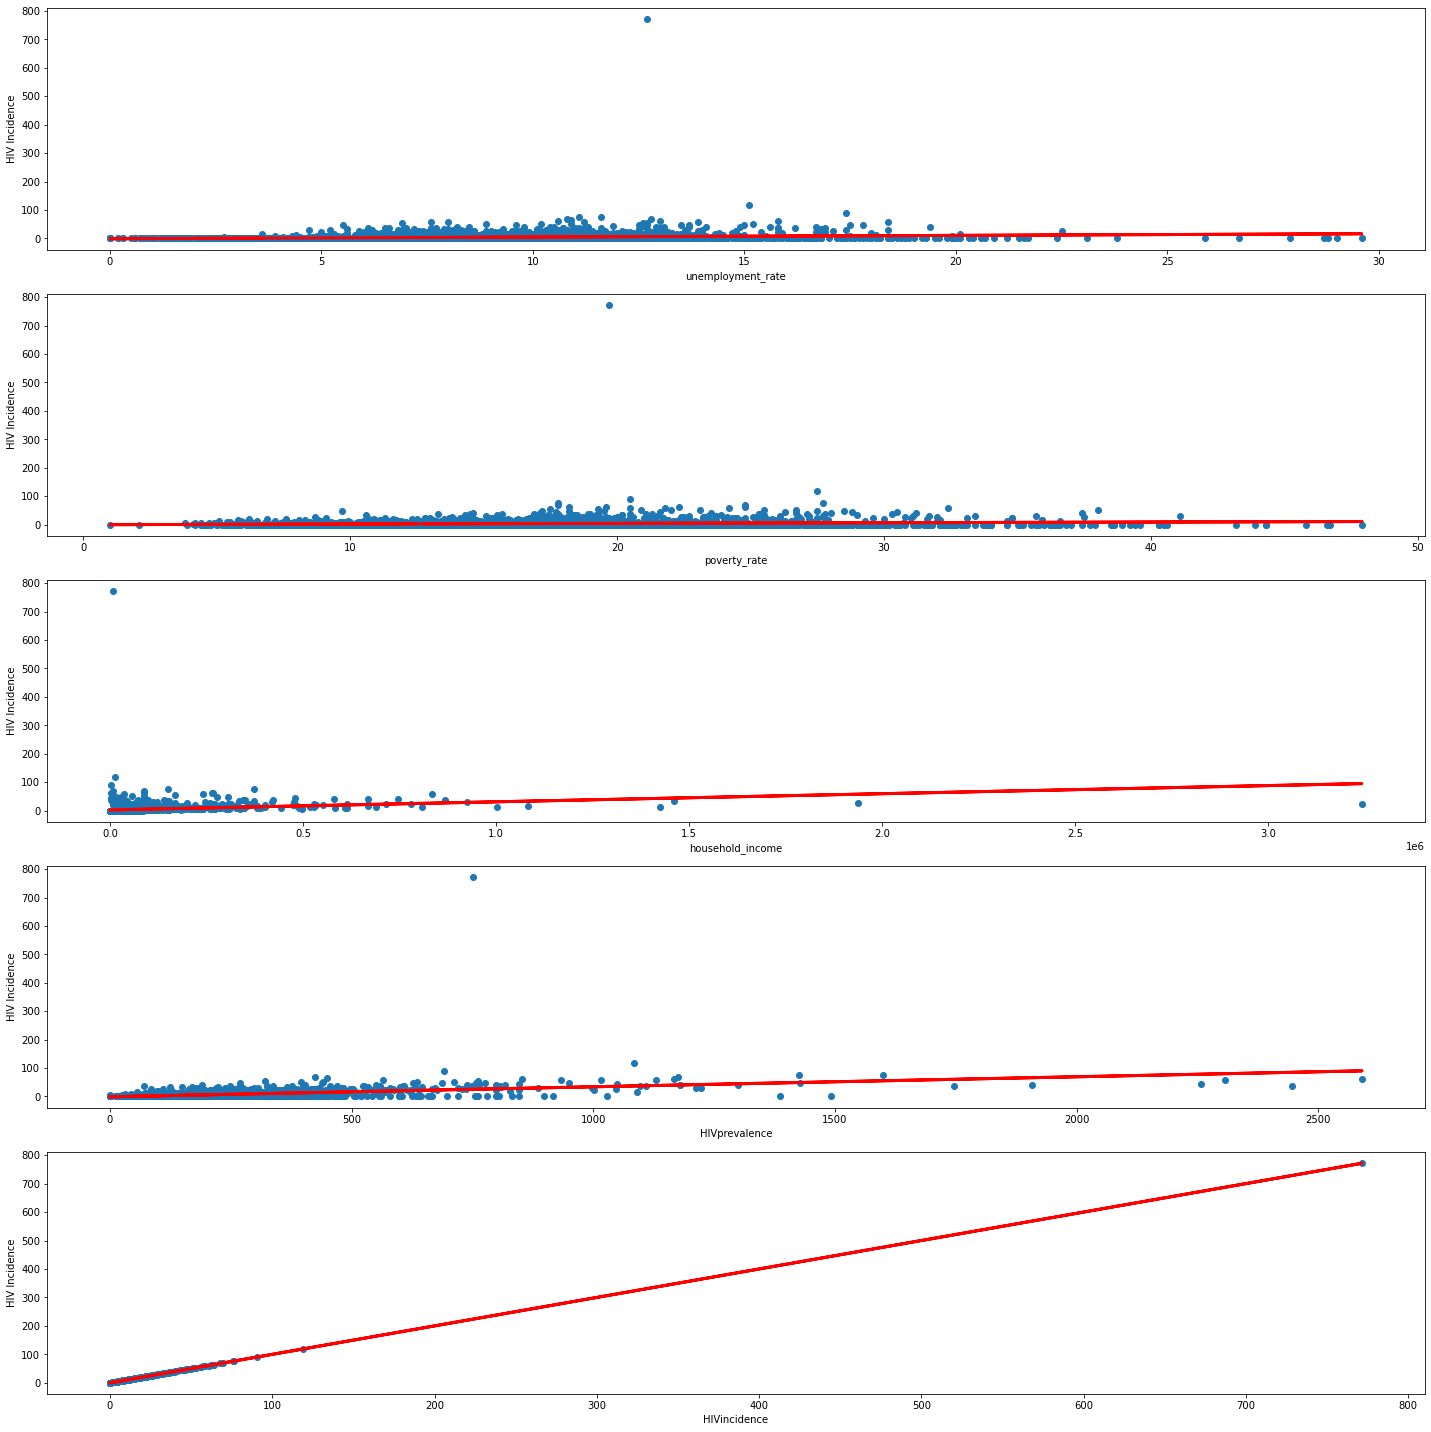

In [36]:
fig, axs = plt.subplots(5,1, figsize = (20,20))
columns = income_df.columns
model = LinearRegression()
for i, ax in enumerate(axs.flatten()):
    X = income_df[columns[i]].values.reshape(-1,1)
    model.fit(X, y)
    y_pred = model.predict(X)
    ax.plot(income_df[columns[i]], y_pred, linewidth = 3, color = 'r')
    ax.scatter(income_df[columns[i]], y)
    ax.set_xlabel(columns[i])
    ax.set_ylabel('HIV Incidence')
fig.tight_layout()

In [35]:
first_test = main_df.drop(['COUNTY', 'county_code', 'STATEABBREVIATION', 'YEAR'], axis=1)

In [26]:
first_test['mme_percap'] = first_test['mme_percap'].fillna(np.mean(first_test['mme_percap']))
first_test['partD30dayrxrate'] = first_test['partD30dayrxrate'].fillna(np.mean(first_test['partD30dayrxrate']))
first_test['drugdep'] = first_test['drugdep'].fillna(np.mean(first_test['drugdep']))
first_test['pctunmetneed'] = first_test['pctunmetneed'].fillna(np.mean(first_test['pctunmetneed']))
first_test['nonmedpain'] = first_test['nonmedpain'].fillna(np.mean(first_test['nonmedpain']))

In [27]:
X = first_test.drop('HIVincidence', axis=1)
y = first_test['HIVincidence']

In [ ]:
# model = LinearRegression()
# scaler = StandardScaler()
# scaler.fit_transform(X,y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

In [46]:
from itertools import combinations
from copy import deepcopy
from sklearn.metrics import r2_score
import quantecon as qe
from sklearn.datasets import make_friedman1
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
def Eliminate_One(reg, X, y, included_features):
    '''
    Eliminate One
    For a provided regressor, evaluate the ideal subset of n-1 features to try from
    a provided list of n features.  This function can be called itterative to perform
    recursive feature elimination for a general regression model (not leveraging feature
    importances).
    Inputs -
    * reg = a regression model matching the sklearn mechanics
    * X, y = numpy arrays for the features and targets
    * included_features = numpy array indicating the column indexes to subset from
    '''
    best_r2 = -1
    best_reg = deepcopy(reg)
    best_features = None
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
    print('***Trying {} combinations of features.'.format(included_features.shape[0]-1))
    for feats in combinations(included_features, included_features.shape[0]-1):
        reg.fit(X_train[:, feats], y_train)
        r2 = r2_score(y_test, reg.predict(X_test[:, feats]))
        if r2 > best_r2:
            best_r2 = r2
            best_reg = deepcopy(reg)
            best_features = np.array(feats)
    return best_reg, best_r2, best_features

In [47]:
# n_samples = X_fri.shape[0]
# n_features = X_fri.shape[1]
# r2_scores = np.zeros(n_features)
# adj_r2_scores = np.zeros(n_features)
# feats = np.array(list(range(n_features)))

# # Hint: consider debugging with 3 steps instead of all 100.
# # N.B. this is a brute force approach, and will take a long time.  This is a nice demonstration
# # of the practical drawbacks to KNN.  
# for p in range(1, n_features):
#     qe.util.tic()
#     reg, r2, feats = Eliminate_One(KNeighborsRegressor(n_neighbors=10), X_fri, y_fri, feats)
#     qe.util.toc()
#     adj_r2 = 1 - ((1 - r2)*(n_samples - 1)/(n_samples - (n_features - p) - 1))
#     r2_scores[p-1] = r2
#     adj_r2_scores[p-1] = adj_r2
#     print("With {0} features eliminated we have an adjusted R^2 of {1:.3f}".format(p, adj_r2))

In [48]:
n_features = X.shape[1]
n_features

34

In [50]:
n_samples = X.shape[0]
n_features = X.shape[1]
r2_scores = np.zeros(n_features)
adj_r2_scores = np.zeros(n_features)
feats = np.array(list(range(n_features)))
best_feats = []

# Hint: consider debugging with 3 steps instead of all 100.
# N.B. this is a brute force approach, and will take a long time.  This is a nice demonstration
# of the practical drawbacks to KNN.  
scaler = StandardScaler()
scaler.fit_transform(X,y)
for p in range(1, n_features):
    qe.util.tic()
    reg, r2, feats = Eliminate_One(LinearRegression(), X.values, y.values, feats)
    qe.util.toc()
    adj_r2 = 1 - ((1 - r2)*(n_samples - 1)/(n_samples - (n_features - p) - 1))
    r2_scores[p-1] = r2
    adj_r2_scores[p-1] = adj_r2
    print("With {0} features eliminated we have an adjusted R^2 of {1:.3f}".format(p, adj_r2))
    print(feats)

***Trying 33 combinations of features.
TOC: Elapsed: 0:00:0.15
With 1 features eliminated we have an adjusted R^2 of 0.413
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
***Trying 32 combinations of features.
TOC: Elapsed: 0:00:0.09
With 2 features eliminated we have an adjusted R^2 of 0.429
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 27 28 29 30 31 32 33]
***Trying 31 combinations of features.
TOC: Elapsed: 0:00:0.09
With 3 features eliminated we have an adjusted R^2 of 0.444
[ 0  1  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26
 27 28 29 30 31 32 33]
***Trying 30 combinations of features.
TOC: Elapsed: 0:00:0.07
With 4 features eliminated we have an adjusted R^2 of 0.453
[ 0  1  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 22 24 25 26 27
 28 29 30 31 32 33]
***Trying 29 combinations of features.
TOC: Elapsed: 0:00:0.10
With 5 features eliminated we have an adjusted R^2 of 0

In [51]:
best_feats_idx = [3, 8, 12, 19, 26, 29, 30, 33]

In [53]:
X.iloc[:, best_feats_idx]

,HIVprevalence,Med_SMAT_fac,SA_fac,partD30dayrxrate,ADULTMEN,%msm12month,%msm5yr,household_income
0,225.5,0.0,2.0,2.34,19410,1.715611,2.648120,20304
1,163.9,0.0,2.0,2.56,69724,1.326659,2.049509,73058
2,436.0,0.0,1.0,1.46,11567,0.708913,1.097951,9145
3,191.9,1.0,1.0,0.39,9508,1.251578,1.935212,7078
4,95.4,0.0,1.0,1.22,21368,2.812617,4.342943,20934
5,691.4,0.0,0.0,1.78,4597,1.587992,2.458125,3746
6,268.4,0.0,0.0,2.09,7088,0.550226,0.846501,8253
7,211.2,2.0,6.0,2.97,43018,1.608629,2.487331,45348
8,366.9,0.0,0.0,1.74,12467,0.978583,1.507981,13901
9,90.1,0.0,1.0,2.91,10194,0.549343,0.853443,11726
